# Encoder-Decoder LSTM
## Resource Links:
https://machinelearningmastery.com/how-to-develop-lstm-models-for-multi-step-time-series-forecasting-of-household-power-consumption/

https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

https://machinelearningmastery.com/how-to-use-the-timeseriesgenerator-for-time-series-forecasting-in-keras/

https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/

https://machinelearningmastery.com/multi-step-time-series-forecasting-long-short-term-memory-networks-python/

https://machinelearningmastery.com/multi-step-time-series-forecasting/

https://www.analyticsvidhya.com/blog/2020/10/multivariate-multi-step-time-series-forecasting-using-stacked-lstm-sequence-to-sequence-autoencoder-in-tensorflow-2-0-keras/

[Latest] https://analyticsindiamag.com/using-encoder-decoder-lstm-in-univariate-horizon-style-for-time-series-modelling/

[Keras Tuner] https://keras.io/keras_tuner/

[Attention Layer] -- Implement

[Documentation] https://towardsdatascience.com/time-series-forecasting-with-deep-learning-and-attention-mechanism-2d001fc871fc

**Changed Multi Step Function**

**Unique variable names for ED models**


## Importing Modules & Data

In [ ]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/subhmm/MeanEquatorTemperature/main/Mean_Eq.csv', index_col='month')

In [ ]:
# df = df[['1', '2', '3', '5', '7', '10', '20', '30', '50', '70', '100']]

### Checking Missing Values

In [ ]:
# sns.heatmap(df.isna(),yticklabels=False, cbar=False, cmap='RdYlBu_r')

In [ ]:
## Dropped Missing Samples
df = df.dropna(axis=1)
df

,1,2,3,5,7,10,20,30,50,70,100,125,150,175,200,225,250
month,,,,,,,,,,,,,,,,,
1979-01,270.00,268.64,260.98,245.88,237.64,230.75,219.01,212.99,206.00,196.89,190.64,197.41,205.39,212.98,219.98,226.35,232.13
1979-02,276.98,274.33,262.37,245.62,236.56,228.61,217.18,211.56,204.20,196.32,191.05,196.76,204.64,212.44,219.62,226.12,231.98
1979-03,274.81,276.09,267.97,251.23,240.71,232.58,220.38,213.30,204.92,197.01,190.96,196.86,204.81,212.65,219.89,226.42,232.30
1979-04,272.52,272.11,263.99,250.66,243.72,235.46,223.63,215.93,206.80,198.18,191.38,196.76,204.89,212.82,220.13,226.72,232.63
1979-05,269.69,270.55,263.53,248.56,241.75,236.05,224.14,216.42,207.51,199.17,192.80,197.57,205.22,212.95,220.18,226.73,232.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08,264.91,259.01,249.97,236.56,232.11,228.60,220.42,216.00,209.63,201.67,194.41,199.17,206.17,213.30,220.10,226.42,232.22
2020-09,265.27,263.68,254.02,240.74,235.60,230.54,220.44,215.31,208.56,201.77,194.58,199.27,206.03,213.06,219.90,226.28,232.13
2020-10,264.45,262.80,255.15,242.78,237.87,232.45,221.93,216.13,208.35,202.27,192.94,198.30,205.53,212.94,219.96,226.39,232.26


### Train Test Split


**Train** ----------1982-01 to 2008-12 ---  *70%*

**Validation** ---2009-01 to 2018-12 ---  *23%*

**Test** -----------        2019-01 to 2020-12  ---  *7%*



In [ ]:
## 1982-01 to 2008-12 --- 70%

df_train = df.iloc[:450,:]
df_train

,1,2,3,5,7,10,20,30,50,70,100,125,150,175,200,225,250
month,,,,,,,,,,,,,,,,,
1979-01,270.00,268.64,260.98,245.88,237.64,230.75,219.01,212.99,206.00,196.89,190.64,197.41,205.39,212.98,219.98,226.35,232.13
1979-02,276.98,274.33,262.37,245.62,236.56,228.61,217.18,211.56,204.20,196.32,191.05,196.76,204.64,212.44,219.62,226.12,231.98
1979-03,274.81,276.09,267.97,251.23,240.71,232.58,220.38,213.30,204.92,197.01,190.96,196.86,204.81,212.65,219.89,226.42,232.30
1979-04,272.52,272.11,263.99,250.66,243.72,235.46,223.63,215.93,206.80,198.18,191.38,196.76,204.89,212.82,220.13,226.72,232.63
1979-05,269.69,270.55,263.53,248.56,241.75,236.05,224.14,216.42,207.51,199.17,192.80,197.57,205.22,212.95,220.18,226.73,232.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-02,269.81,261.76,252.95,238.00,231.99,225.73,217.51,213.18,202.73,195.67,192.25,199.12,206.91,214.47,221.51,227.94,233.76
2016-03,268.76,268.02,257.57,240.79,233.85,227.31,218.73,213.66,201.42,193.58,191.73,198.81,206.78,214.54,221.73,228.25,234.10
2016-04,266.85,265.76,259.99,246.41,236.47,230.49,221.64,216.18,201.72,193.89,192.11,198.85,206.82,214.56,221.74,228.26,234.10


In [ ]:
## 2009-01 to 2018-12 --- 23%

df_validation = df.iloc[450:480,:]
df_validation

,1,2,3,5,7,10,20,30,50,70,100,125,150,175,200,225,250
month,,,,,,,,,,,,,,,,,
2016-07,264.22,259.03,250.12,239.15,231.85,228.12,221.96,217.38,209.00,199.69,194.09,198.71,205.67,212.93,219.82,226.17,231.96
2016-08,263.29,261.17,250.41,235.68,230.32,226.99,221.02,216.60,210.12,200.16,193.94,199.07,206.05,213.21,220.10,226.45,232.23
2016-09,265.80,265.32,256.48,240.16,234.06,229.33,221.05,215.90,209.31,199.46,193.53,198.51,205.51,212.87,219.84,226.25,232.06
2016-10,266.26,263.76,256.34,242.31,235.42,230.64,221.67,215.89,208.27,198.84,191.60,197.87,205.58,213.16,220.25,226.71,232.57
2016-11,266.05,261.81,255.32,241.84,233.82,228.93,220.87,215.28,207.04,196.25,190.53,197.73,205.52,213.10,220.18,226.65,232.52
2016-12,264.71,258.31,252.06,239.16,231.26,226.43,219.22,214.09,206.17,196.04,190.55,197.83,205.65,213.15,220.14,226.54,232.38
2017-01,265.97,254.62,248.56,235.60,229.47,224.79,217.94,213.30,206.10,197.07,191.38,198.05,205.53,212.95,219.89,226.23,232.01
2017-02,271.30,260.48,248.10,237.34,231.08,225.75,217.73,212.64,205.35,197.05,191.64,197.96,205.41,212.82,219.84,226.27,232.10
2017-03,269.58,266.58,253.77,241.31,235.01,228.98,219.72,214.01,206.08,197.86,192.12,197.84,205.38,212.88,219.93,226.38,232.21


In [ ]:
## 2019-01 to 2020-12 --- 7%
df_testY = df.iloc[480:,:]
df_testY

,1,2,3,5,7,10,20,30,50,70,100,125,150,175,200,225,250
month,,,,,,,,,,,,,,,,,
2019-01,263.52,252.04,245.22,234.71,230.04,226.62,220.56,215.72,204.55,191.05,191.43,198.66,206.07,213.45,220.43,226.80,232.59
2019-02,271.13,259.12,247.99,237.82,231.79,227.55,221.38,216.57,205.97,193.21,191.06,198.14,206.02,213.58,220.58,226.96,232.71
2019-03,268.85,267.11,253.41,239.46,233.14,229.07,221.59,216.47,206.32,195.25,191.72,197.95,205.66,213.28,220.40,226.89,232.75
2019-04,266.02,265.29,257.50,241.30,233.65,228.84,221.57,216.29,206.39,196.65,191.23,198.16,206.14,213.91,221.09,227.60,233.45
2019-05,265.54,261.99,256.27,244.65,235.01,229.06,221.48,216.37,207.19,198.45,192.32,198.20,205.96,213.67,220.84,227.36,233.23
2019-06,261.21,257.08,252.07,243.89,235.55,228.51,220.00,215.46,207.82,200.96,193.78,199.01,206.34,213.83,220.87,227.32,233.18
2019-07,259.22,254.20,248.59,240.58,233.80,226.88,218.36,214.27,208.47,203.24,196.21,199.14,205.79,212.97,219.83,226.17,231.96
2019-08,264.09,258.80,251.84,241.22,233.20,226.82,217.69,213.34,208.10,203.22,196.03,199.69,206.21,213.21,220.03,226.33,232.07
2019-09,264.60,261.30,254.50,242.70,232.05,224.46,214.46,210.31,205.41,200.60,194.64,198.95,205.96,213.13,219.94,226.25,232.03


### Preprocessing

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
scaler = MinMaxScaler() #feature_range=(0,1) ## Default
scaler.fit(df_train)   ## Will use this same scale in future

MinMaxScaler()

In [ ]:
### Scaling Train Dataset
scaled_train = scaler.transform(df_train)
df_scaled_train = pd.DataFrame(scaled_train, columns=df_train.columns, index=df_train.index) ## Converting to dataframe

In [ ]:
### Scaling Test based on Train Dataset
scaled_test = scaler.transform(df_validation)
df_scaled_test = pd.DataFrame(scaled_test, columns=df_validation.columns, index=df_validation.index) ## Converting to dataframe

### Preparing Model

##### Converting the series to samples

In [ ]:
def split_series(series, n_past, n_future):
  #
  # n_past ==> no of past observations
  #
  # n_future ==> no of future observations
  #
  X, y = list(), list()
  for window_start in range(len(series)):
    past_end = window_start + n_past
    future_end = past_end + n_future
    if future_end > len(series):
      break
    # slicing the past and future parts of the window
    past, future = series[window_start:past_end, :], series[past_end:future_end, :]
    X.append(past)
    y.append(future)
  return np.array(X), np.array(y)

In [ ]:
n_past = 5  ## optimal 10
n_future = 2   ## optimal 5
n_features = 17

In [ ]:
X_train, y_train = split_series(df_scaled_train.values,n_past, n_future)
print('Train: X_train Shape', X_train.shape,'y_train Shape', y_train.shape)

X_test, y_test = split_series(df_scaled_test.values,n_past, n_future)
print('Test: X_test Shape', X_test.shape,'y_test Shape', y_test.shape)


Train: X_train Shape (444, 5, 17) y_train Shape (444, 2, 17)
Test: X_test Shape (24, 5, 17) y_test Shape (24, 2, 17)


### Model Architecture

In [ ]:
import tensorflow as tf
import os

# Encoder Decoder ==> Sequence to Sequence Model

In [ ]:
# E2D2
# n_features ==> no of features at each timestep in the data.
#
encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))
encoder_l1 = tf.keras.layers.LSTM(100,return_sequences = True, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)
encoder_states1 = encoder_outputs1[1:]
encoder_l2 = tf.keras.layers.LSTM(100, return_state=True)
encoder_outputs2 = encoder_l2(encoder_outputs1[0])
encoder_states2 = encoder_outputs2[1:]
#
decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs2[0])
#
decoder_l1 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
decoder_l2 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_l1,initial_state = encoder_states2)
decoder_outputs2 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(decoder_l2)
#
modelE2D2 = tf.keras.models.Model(encoder_inputs,decoder_outputs2)
#
modelE2D2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 5, 17)]      0           []                               
                                                                                                  
 lstm (LSTM)                    [(None, 5, 100),     47200       ['input_1[0][0]']                
                                 (None, 100),                                                     
                                 (None, 100)]                                                     
                                                                                                  
 lstm_1 (LSTM)                  [(None, 100),        80400       ['lstm[0][0]']                   
                                 (None, 100),                                                 

In [ ]:
# E1D1
# n_features ==> no of features at each timestep in the data.
#
encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))
encoder_l1 = tf.keras.layers.LSTM(100, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)

encoder_states1 = encoder_outputs1[1:]

#
decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs1[0])

#
decoder_l1 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
decoder_outputs1 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(decoder_l1)

#
modelE1D1 = tf.keras.models.Model(encoder_inputs,decoder_outputs1)

#
modelE1D1.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 5, 17)]      0           []                               
                                                                                                  
 lstm_4 (LSTM)                  [(None, 100),        47200       ['input_2[0][0]']                
                                 (None, 100),                                                     
                                 (None, 100)]                                                     
                                                                                                  
 repeat_vector_1 (RepeatVector)  (None, 2, 100)      0           ['lstm_4[0][0]']                 
                                                                                            

In [ ]:
encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))
encoder_l1 = tf.keras.layers.LSTM(128,return_sequences = True, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)
encoder_states1 = encoder_outputs1[1:]

encoder_l2 = tf.keras.layers.LSTM(128, return_sequences = True, return_state=True)
encoder_outputs2 = encoder_l2(encoder_outputs1[0])
encoder_states2 = encoder_outputs2[1:]

encoder_l3 = tf.keras.layers.LSTM(128, return_sequences = True, return_state=True)
encoder_outputs3 = encoder_l3(encoder_outputs2[0])
encoder_states3 = encoder_outputs3[1:]

encoder_l4 = tf.keras.layers.LSTM(128, return_state=True, dropout=0.8)
encoder_outputs4 = encoder_l4(encoder_outputs3[0])
encoder_states4 = encoder_outputs4[1:]

#
decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs4[0])
#
decoder_l1 = tf.keras.layers.LSTM(128, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)

decoder_l2 = tf.keras.layers.LSTM(128, return_sequences=True)(decoder_l1,initial_state = encoder_states2)

decoder_l3 = tf.keras.layers.LSTM(128, return_sequences=True)(decoder_l2,initial_state = encoder_states3)

decoder_l4 = tf.keras.layers.LSTM(128, return_sequences=True, dropout=0.7)(decoder_l3,initial_state = encoder_states4)

decoder_outputs2 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(decoder_l4)
#
modelE4D4 = tf.keras.models.Model(encoder_inputs,decoder_outputs2)
#
modelE4D4.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 5, 17)]      0           []                               
                                                                                                  
 lstm_6 (LSTM)                  [(None, 5, 128),     74752       ['input_3[0][0]']                
                                 (None, 128),                                                     
                                 (None, 128)]                                                     
                                                                                                  
 lstm_7 (LSTM)                  [(None, 5, 128),     131584      ['lstm_6[0][0]']                 
                                 (None, 128),                                               

### Training The Models

I have used Adam optimizer and Huber loss as the loss function.  Let’s compile and run the model.

In [ ]:
reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.90 ** x)
earlystopping = tf.keras.callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 10, restore_best_weights = True)

In [ ]:
### ModelE1D1
modelE1D1.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber(), metrics=['mse']) #
historyE1D1=modelE1D1.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),batch_size=8,verbose=1)#, callbacks=[reduce_lr, earlystopping])

Epoch 1/100
56/56 [==============================] - 8s 21ms/step - loss: 0.0258 - mse: 0.0515 - val_loss: 0.0153 - val_mse: 0.0305
Epoch 2/100
56/56 [==============================] - 0s 5ms/step - loss: 0.0131 - mse: 0.0262 - val_loss: 0.0110 - val_mse: 0.0220
Epoch 3/100
56/56 [==============================] - 0s 6ms/step - loss: 0.0105 - mse: 0.0209 - val_loss: 0.0092 - val_mse: 0.0183
Epoch 4/100
56/56 [==============================] - 0s 5ms/step - loss: 0.0087 - mse: 0.0174 - val_loss: 0.0086 - val_mse: 0.0171
Epoch 5/100
56/56 [==============================] - 0s 5ms/step - loss: 0.0075 - mse: 0.0151 - val_loss: 0.0070 - val_mse: 0.0139
Epoch 6/100
56/56 [==============================] - 0s 5ms/step - loss: 0.0066 - mse: 0.0133 - val_loss: 0.0078 - val_mse: 0.0157
Epoch 7/100
56/56 [==============================] - 0s 6ms/step - loss: 0.0058 - mse: 0.0116 - val_loss: 0.0074 - val_mse: 0.0148
Epoch 8/100
56/56 [==============================] - 0s 6ms/step - loss: 0.0054 - 

In [ ]:
### ModelE2D2
modelE2D2.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber(), metrics=['mse']) #
historyE2D2=modelE2D2.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),batch_size=8,verbose=1)#, callbacks=[reduce_lr, earlystopping])

Epoch 1/100
56/56 [==============================] - 7s 30ms/step - loss: 0.0281 - mse: 0.0563 - val_loss: 0.0143 - val_mse: 0.0286
Epoch 2/100
56/56 [==============================] - 0s 8ms/step - loss: 0.0129 - mse: 0.0257 - val_loss: 0.0104 - val_mse: 0.0208
Epoch 3/100
56/56 [==============================] - 0s 8ms/step - loss: 0.0110 - mse: 0.0221 - val_loss: 0.0102 - val_mse: 0.0203
Epoch 4/100
56/56 [==============================] - 0s 8ms/step - loss: 0.0093 - mse: 0.0185 - val_loss: 0.0085 - val_mse: 0.0170
Epoch 5/100
56/56 [==============================] - 0s 8ms/step - loss: 0.0086 - mse: 0.0171 - val_loss: 0.0078 - val_mse: 0.0157
Epoch 6/100
56/56 [==============================] - 0s 8ms/step - loss: 0.0084 - mse: 0.0168 - val_loss: 0.0081 - val_mse: 0.0161
Epoch 7/100
56/56 [==============================] - 0s 8ms/step - loss: 0.0068 - mse: 0.0137 - val_loss: 0.0070 - val_mse: 0.0139
Epoch 8/100
56/56 [==============================] - 0s 8ms/step - loss: 0.0060 - 

In [ ]:
### ModelE4D4
modelE4D4.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber(), metrics=['mse']) #
historyE4D4=modelE4D4.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),batch_size=8,verbose=1)#, callbacks=[reduce_lr, earlystopping])

Epoch 1/100
56/56 [==============================] - 13s 56ms/step - loss: 0.0325 - mse: 0.0649 - val_loss: 0.0186 - val_mse: 0.0372
Epoch 2/100
56/56 [==============================] - 1s 14ms/step - loss: 0.0165 - mse: 0.0331 - val_loss: 0.0164 - val_mse: 0.0328
Epoch 3/100
56/56 [==============================] - 1s 13ms/step - loss: 0.0150 - mse: 0.0299 - val_loss: 0.0115 - val_mse: 0.0231
Epoch 4/100
56/56 [==============================] - 1s 14ms/step - loss: 0.0130 - mse: 0.0260 - val_loss: 0.0121 - val_mse: 0.0242
Epoch 5/100
56/56 [==============================] - 1s 13ms/step - loss: 0.0117 - mse: 0.0234 - val_loss: 0.0096 - val_mse: 0.0192
Epoch 6/100
56/56 [==============================] - 1s 13ms/step - loss: 0.0106 - mse: 0.0211 - val_loss: 0.0098 - val_mse: 0.0195
Epoch 7/100
56/56 [==============================] - 1s 13ms/step - loss: 0.0099 - mse: 0.0199 - val_loss: 0.0108 - val_mse: 0.0216
Epoch 8/100
56/56 [==============================] - 1s 13ms/step - loss: 0

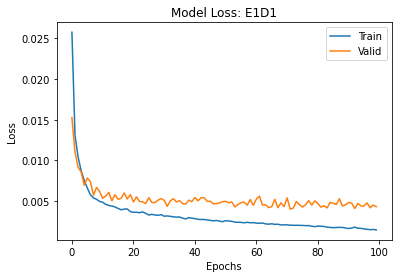

In [ ]:
plt.plot(historyE1D1.history['loss'])
plt.plot(historyE1D1.history['val_loss'])
plt.title("Model Loss: E1D1")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Valid'])

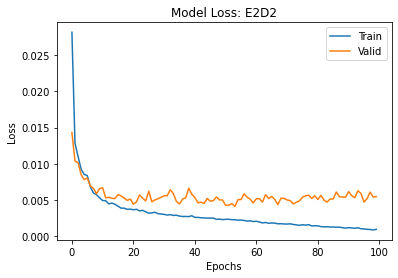

In [ ]:
plt.plot(historyE2D2.history['loss'])
plt.plot(historyE2D2.history['val_loss'])
plt.title("Model Loss: E2D2")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Valid'])


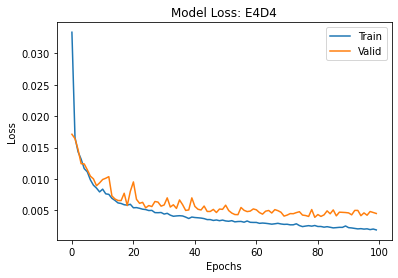

In [ ]:

plt.plot(historyE4D4.history['loss'])
plt.plot(historyE4D4.history['val_loss'])
plt.title("Model Loss: E4D4")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Valid'])
plt.show()

In [ ]:
print('Model Summary after Training and Validation\n\n')

results = modelE1D1.evaluate(X_test,y_test)
results = modelE2D2.evaluate(X_test,y_test)
results = modelE4D4.evaluate(X_test,y_test)
# print("test validation loss, test acc:", results)

Model Summary after Training and Validation


1/1 [==============================] - 2s 2s/step - loss: 0.0052 - mse: 0.0104


#### Multistep Prediction

In [ ]:
#Shifting by Auto-shift using n_past
df_testX = df_scaled_test.iloc[-n_past:,:]
df_testX

,1,2,3,5,7,10,20,30,50,70,100,125,150,175,200,225,250
month,,,,,,,,,,,,,,,,,
2018-08,0.345957,0.289283,0.211912,0.259198,0.281672,0.351440,0.717105,0.672474,0.573489,0.729314,0.743855,0.789298,0.511254,0.441327,0.400922,0.374165,0.357466
2018-09,0.501277,0.437147,0.312399,0.361889,0.370418,0.405761,0.632310,0.767944,0.547390,0.686979,0.623545,0.602007,0.456592,0.461735,0.453917,0.445434,0.441176
2018-10,0.516170,0.490330,0.369125,0.425590,0.457235,0.502058,0.614766,0.723345,0.436813,0.498396,0.316947,0.484950,0.491961,0.515306,0.509217,0.503341,0.506787
2018-11,0.429787,0.449234,0.349271,0.362438,0.437942,0.497942,0.605263,0.664111,0.383929,0.289288,0.135834,0.418060,0.549839,0.619898,0.626728,0.628062,0.635747
2018-12,0.255745,0.045125,0.024311,0.118067,0.161415,0.179424,0.421053,0.517073,0.365385,0.173188,0.222510,0.535117,0.588424,0.594388,0.576037,0.563474,0.563348


In [ ]:
### Using model
model = modelE1D1

In [ ]:
### Multi-Step Prediction
testY = []
future = 24
testX = df_testX.values

while True:
  if len(testY) >= future:
    break
  test_pred = model.predict(np.array([testX])) #np.array([testX])#
  testY.extend(test_pred[0])
  # print(testX[n_future:].shape, test_pred[0].shape)
  testX = np.append(testX[n_future:], test_pred[0], axis = 0)
## Adding Further Preds, stopping loop early.
testY = testY[0:future]

In [ ]:
# testY - Final Prediction
test_predY = pd.DataFrame(scaler.inverse_transform(np.array(testY)), columns=df_testY.columns, index=df_testY.index)
test_predY

,1,2,3,5,7,10,20,30,50,70,100,125,150,175,200,225,250
month,,,,,,,,,,,,,,,,,
2019-01,263.504089,256.881836,248.369080,235.068298,229.596771,225.887650,220.695419,216.165237,204.258942,193.378204,191.218948,198.650650,206.006958,213.591705,220.423584,226.543228,232.574142
2019-02,268.911774,262.394653,250.083374,236.925568,231.195374,226.602066,220.456879,215.561386,204.637970,194.639984,191.541275,198.226807,205.579895,213.129166,220.047791,226.147797,232.111191
2019-03,266.798309,267.741699,257.130920,240.830658,234.321533,228.602982,220.979843,216.344559,204.620316,195.860458,191.348129,197.884705,205.703537,213.211761,220.189423,226.459503,232.494705
2019-04,264.554901,265.817535,258.838470,243.512741,235.278290,229.477615,221.801926,216.636993,205.599930,197.236221,191.263184,197.815765,205.713120,213.288940,220.275452,226.658981,232.595596
2019-05,263.328247,261.797150,255.431274,243.743881,235.368103,229.987610,221.778259,216.787170,206.339905,197.941071,191.604767,197.912460,205.610245,213.213852,220.213730,226.622498,232.580841
2019-06,262.179413,258.750702,252.294998,241.720535,234.364227,229.127228,221.175385,216.386917,207.553711,200.814651,193.027039,198.216232,205.492462,212.930130,219.777405,226.031708,232.063522
2019-07,262.028809,259.263550,250.134460,238.375412,232.725433,227.771255,219.800964,214.980652,207.789459,202.221939,194.379608,198.466431,205.426773,212.578888,219.421295,225.870331,231.598114
2019-08,263.866272,262.416687,251.942978,239.480881,233.205032,228.012192,219.408112,214.372620,207.667801,202.430038,194.673782,198.612213,205.521164,212.734558,219.590332,225.997467,231.731384
2019-09,263.932220,264.413696,256.325256,242.812378,235.896454,229.829498,219.238281,213.884872,206.607117,200.933380,193.873779,198.260239,205.434235,212.777069,219.732681,226.104156,231.931580


### Plotting Comparison

In [ ]:
columns = df.columns

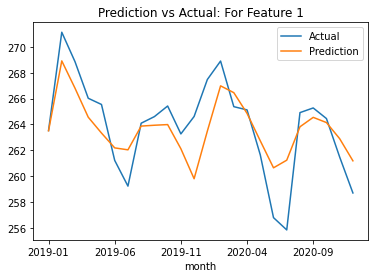

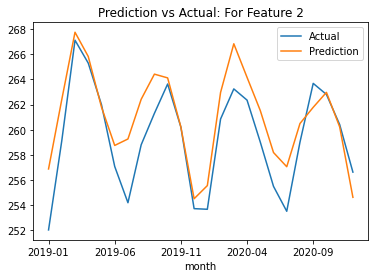

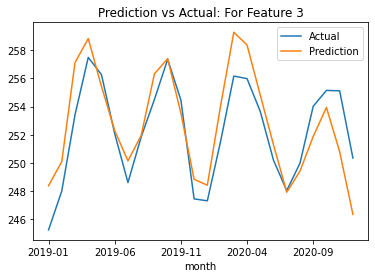

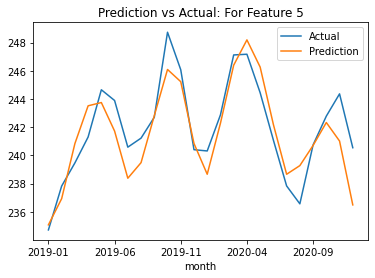

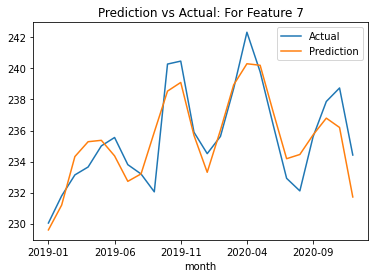

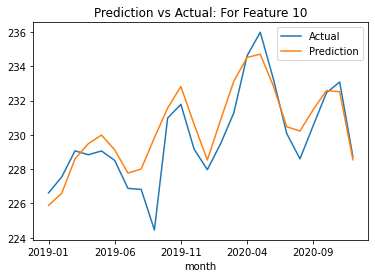

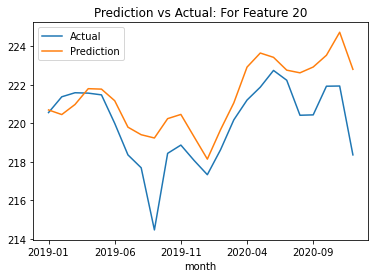

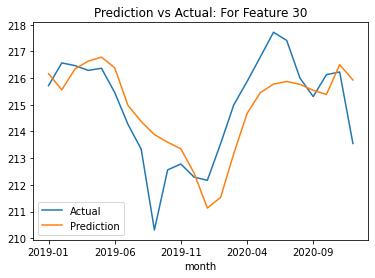

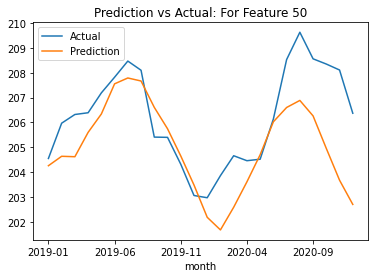

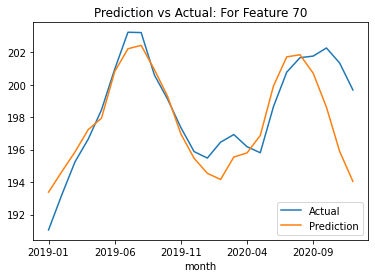

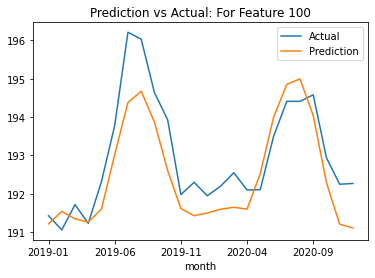

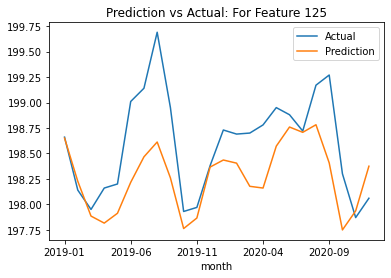

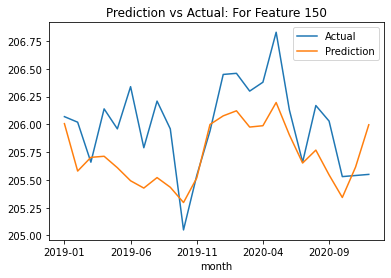

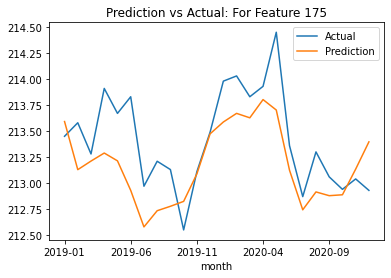

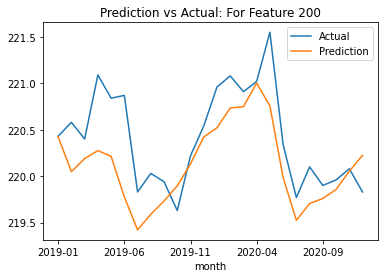

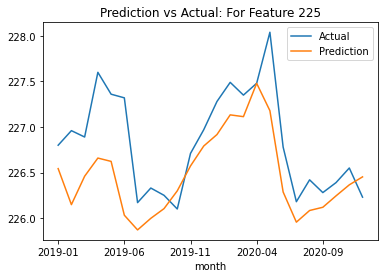

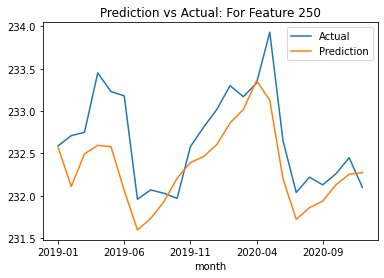

In [ ]:
for column in df.columns: #,columns=['Predicted'] ,columns=['Actual']

  df_plot = pd.concat([pd.DataFrame(df_testY[column]), pd.DataFrame(test_predY[column])], axis=1)
  df_plot.columns = ['Actual','Prediction']
  df_plot.plot(title='Prediction vs Actual: For Feature '+column)


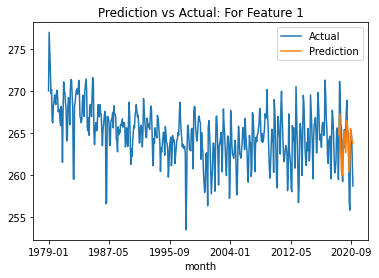

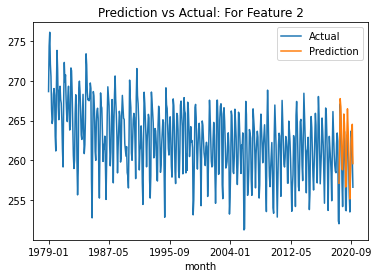

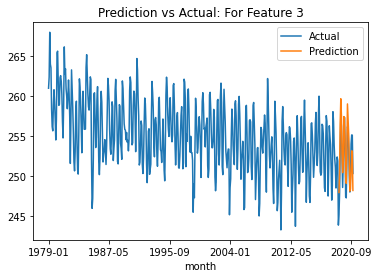

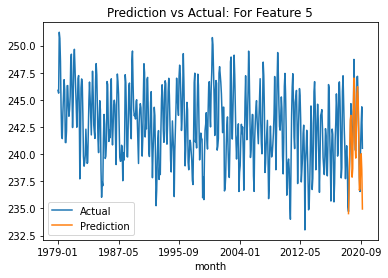

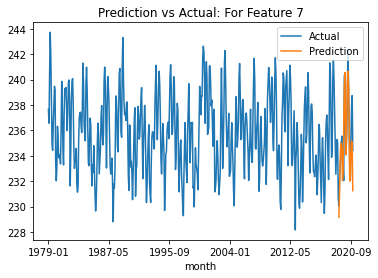

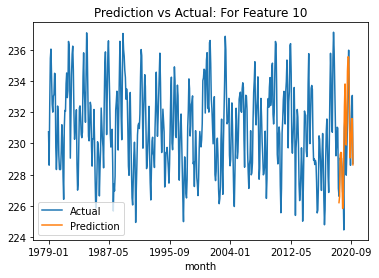

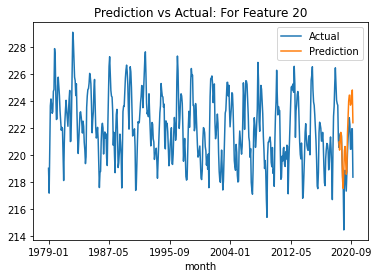

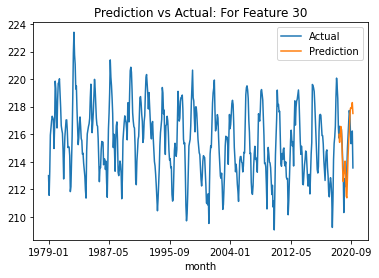

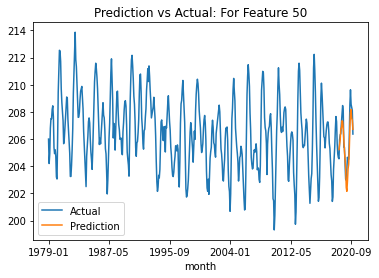

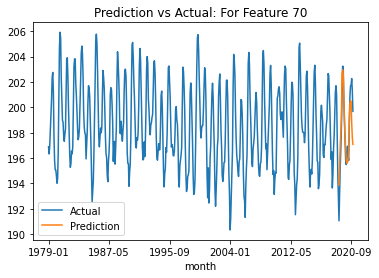

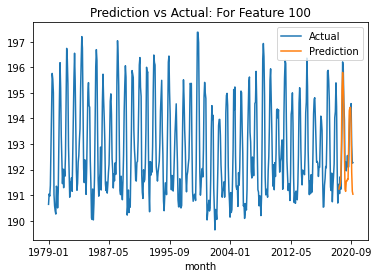

In [ ]:
for column in df.columns: #,columns=['Predicted'] ,columns=['Actual']
  df_plot = pd.concat([pd.DataFrame(df[column]), pd.DataFrame(test_predY[column])], axis=1)
  df_plot.columns = ['Actual','Prediction']
  df_plot.plot(title='Prediction vs Actual: For Feature '+column)
# for column in columns:
#   pd.concat([pd.DataFrame(df[column]), pd.DataFrame(test_predY[column])], axis=1).plot()  #figsize=(18, 6)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def evaluate_forecasts(actual, predicted):
	scores = list()
	# calculate an RMSE score for each Feature/Column
	# print(actual.shape)
	for i in range(actual.shape[1]):
		# calculate mse
		mse = mean_squared_error(actual[:, i], predicted[:, i])
		# calculate rmse
		rmse = sqrt(mse)
		# store
		scores.append(rmse)
	# calculate overall RMSE
	s = 0
  ## Monthly
	for row in range(actual.shape[0]):
		for col in range(actual.shape[1]):
			s += (actual[row, col] - predicted[row, col])**2
	score = sqrt(s / (actual.shape[0] * actual.shape[1]))  ### RMSE Average
	return score, scores

# summarize scores
def summarize_scores(name, score, scores):
	s_scores = ', '.join(['%.1f' % s for s in scores])
	print('%s: [%.3f] %s' % (name, score, s_scores))

evaluate_forecasts(df_testY.values, test_predY.values)

(1.9061558962931544,
 [2.717557818223774,
  2.767930360871724,
  1.9949070887119873,
  2.176902791470412,
  1.6628849246044741,
  1.6520152837770345,
  2.032596075678768,
  1.61460003240171,
  0.9195050452897778,
  1.588788470633315,
  0.7746967807073541])

In [ ]:
df_testY

,1,2,3,5,7,10,20,30,50,70,100
month,,,,,,,,,,,
2019-01,263.52,252.04,245.22,234.71,230.04,226.62,220.56,215.72,204.55,191.05,191.43
2019-02,271.13,259.12,247.99,237.82,231.79,227.55,221.38,216.57,205.97,193.21,191.06
2019-03,268.85,267.11,253.41,239.46,233.14,229.07,221.59,216.47,206.32,195.25,191.72
2019-04,266.02,265.29,257.50,241.30,233.65,228.84,221.57,216.29,206.39,196.65,191.23
2019-05,265.54,261.99,256.27,244.65,235.01,229.06,221.48,216.37,207.19,198.45,192.32
2019-06,261.21,257.08,252.07,243.89,235.55,228.51,220.00,215.46,207.82,200.96,193.78
2019-07,259.22,254.20,248.59,240.58,233.80,226.88,218.36,214.27,208.47,203.24,196.21
2019-08,264.09,258.80,251.84,241.22,233.20,226.82,217.69,213.34,208.10,203.22,196.03
2019-09,264.60,261.30,254.50,242.70,232.05,224.46,214.46,210.31,205.41,200.60,194.64


In [ ]:
test_predY

,1,2,3,5,7,10,20,30,50,70,100
month,,,,,,,,,,,
2019-01,264.796600,257.131958,247.965530,234.521820,229.173462,226.208847,220.948013,215.982574,205.229904,193.872482,191.239349
2019-02,267.271210,261.460480,250.455627,237.000885,230.771927,226.595917,220.359192,215.404144,205.561584,195.148178,191.382874
2019-03,264.986847,267.758270,256.583252,240.274872,233.576660,229.261215,221.168106,215.866730,205.946594,196.939636,191.363464
2019-04,263.028046,266.738312,259.666626,243.108459,234.709320,229.426910,221.669785,216.561172,206.765808,197.990356,191.695175
2019-05,260.588074,263.186981,257.586884,243.573639,234.975662,229.409882,221.366302,216.275375,206.794449,199.280090,192.905334
2019-06,259.894745,258.894653,252.800629,241.552109,234.414078,227.850021,219.724609,215.120834,207.348862,202.611526,195.106491
2019-07,261.878357,258.819214,250.437973,237.881073,232.075058,225.837540,218.074097,213.532211,207.307343,202.960159,195.799301
2019-08,264.060883,262.537109,251.760666,238.672440,232.804581,225.894455,217.530930,212.559875,206.765244,202.597916,195.346039
2019-09,264.973572,265.826202,257.439178,244.291351,236.408279,229.657867,218.901505,213.051407,205.949997,200.795135,194.401123
